In [3]:
import torch
from IPython import display
from matplotlib import pyplot as plt
import numpy as np
import random

### 1. 生成数据集

In [4]:

num_inputs = 2               # 
num_examples = 1000   # 1000个训练样本
true_w = [2, -3.4]    # weight
true_b = 4.2          # bias
features = torch.randn(num_examples, num_inputs, dtype=torch.float32)      # 1000个样本的 面积,房龄 数据

labels = true_w[0] * features[:,0] + true_w[1] * features[:,1] + true_b    # 售价

labels += torch.tensor(np.random.normal(0, 0.01, size=labels.size()), 
                      dtype=torch.float32)   # 加入随机影响因素

In [5]:
print(labels.shape)
print(features[0], labels[0])

torch.Size([1000])
tensor([1.4493, 0.3088]) tensor(6.0560)


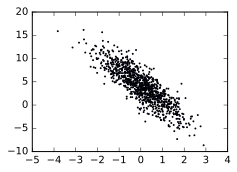

In [6]:
def use_svg_display():
    display.set_matplotlib_formats('svg')
    
def set_figsize(figsize=(3.5, 2.5)):
    use_svg_display()
    plt.rcParams['figure.figsize'] = figsize
    
set_figsize()
plt.scatter(features[:, 1].numpy(), labels.numpy(), 1);
plt.show()

### 2. 读取数据集

In [7]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)          # 计算总的样本数目
    indices = list(range(num_examples))   # 抽取样本下标并变换为列表形式
    random.shuffle(indices)               # 将样本的索引随机打乱
    for i in range(0, num_examples, batch_size):
        j = torch.LongTensor(indices[i: min(i + batch_size, num_examples)])
        yield features.index_select(0, j), labels.index_select(0, j)

In [8]:
## 读取第一个批量
batch_size = 10
for X, y in data_iter(batch_size, features, labels):
    print(X, y)
    break

tensor([[ 0.8419, -1.1689],
        [-0.4904, -0.4597],
        [ 1.7301,  0.7503],
        [-1.6976, -0.4829],
        [ 2.7825, -0.5576],
        [ 0.2162,  1.1469],
        [ 1.1069,  1.2825],
        [-0.5020, -0.5024],
        [-0.1069,  1.9355],
        [ 1.3770,  1.1027]]) tensor([ 9.8563,  4.7946,  5.1310,  2.4396, 11.6753,  0.7323,  2.0611,  4.9130,
        -2.5989,  3.2083])


### 3. 初始化模型参数

In [10]:
w = torch.tensor(np.random.normal(0, 0.01, (num_inputs, 1)), dtype=torch.float32)
b = torch.tensor(1, dtype=torch.float32)

w.requires_grad_(requires_grad=True)   # w, b都是要跟踪他们的值变化
b.requires_grad_(requires_grad=True)

tensor(1., requires_grad=True)

### 4. 定义模型

In [11]:
def linreg(X, w, b):
    return torch.mm(X, w) + b

### 5. 训练模型 —— 损失函数

In [12]:
def squared_loss(y_hat, y):
    return (y_hat - y.view(y_hat.size())) ** 2 / 2 # 返回向量

### 6. 训练模型 ——— 优化算法

In [14]:
def sgd(params, lr, batch_size):
    for param in params:
        param.data -= lr * param.grad / batch_size

### 7. 训练模型

In [17]:
lr = 0.03
num_epochs = 5
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    for X, y in data_iter(batch_size, features, labels):
        l = loss(net(X, w, b), y).sum()
        l.backward()
        sgd([w, b], lr, batch_size)
        
        w.grad.data.zero_()   # 梯度置零
        b.grad.data.zero_()
        
    train_l = loss(net(features, w, b), labels)
    print('epoch %d, loss %f' % (epoch + 1, train_l.mean().item()))

epoch 1, loss 0.000052
epoch 2, loss 0.000052
epoch 3, loss 0.000052
epoch 4, loss 0.000052
epoch 5, loss 0.000052


In [18]:
print(true_w, '\n', w)
print(true_b, '\n', b)

[2, -3.4] 
 tensor([[ 1.9990],
        [-3.3998]], requires_grad=True)
4.2 
 tensor(4.2001, requires_grad=True)
